# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [63]:
import numpy as np
## Data Loading
from sklearn.datasets import load_iris
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import our library
import os
os.chdir('..')
from apenet.nn.models.mlp import MLP
from apenet.utils.data import train_test_split, standardize
from apenet.nn.loss.losses import CrossEntropyLoss
from apenet.nn.optimizers.optimizers import SGD

from apenet.eye.visuals import plot_history

## Setup Random Generator

In [64]:
seed = 42
rng = np.random.default_rng(seed=seed)

# Data Overview

## Load and Preprocess Data


In [65]:
# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target

## Data Visualization

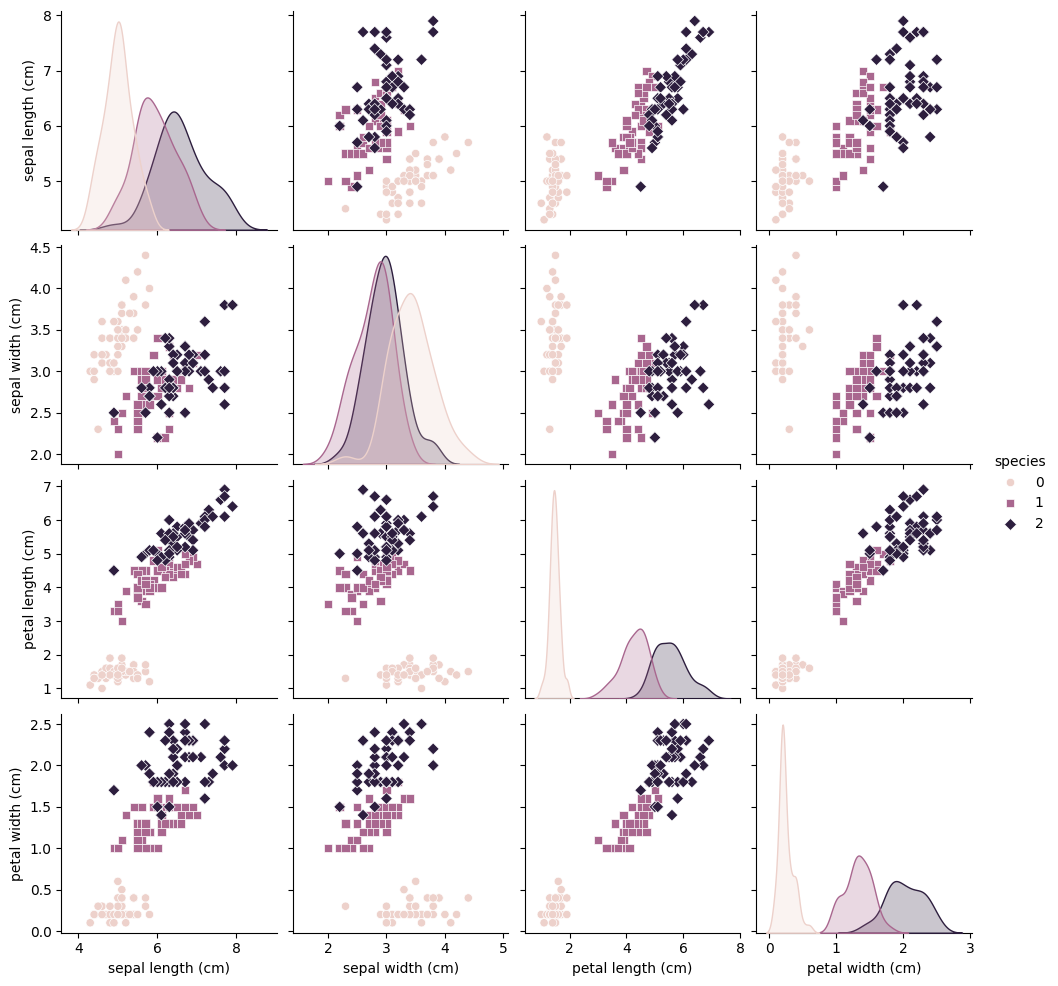

In [66]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

## Data Preprocessing


In [67]:
# Standardize features
X = standardize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rng=rng)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: (120, 4)
Test dataset size: (30, 4)


# Model Overview

## Create Model


In [68]:
# Architecture hyperparameters
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
hidden_sizes = [16,8]

model = MLP(
    input_size=input_size,
    output_size=num_classes,
    hidden_sizes=hidden_sizes,
    initializer='Xavier',
    hidden_activation='relu',
    output_activation=None,
    rng=rng
)

# Training hyperparameters
learning_rate = 0.01
epochs = 100
batch_size = 4

## Define Loss Function and Optimizer


In [69]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.get_parameters(), learning_rate=learning_rate)

## Train Model


In [70]:
# Train model
history = model.fit(
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=epochs,
    batch_size=batch_size,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)


Epoch 1/100: train_loss=1.2703, train_acc=0.3250, val_loss=0.9419, val_acc=0.5333
Epoch 10/100: train_loss=0.4764, train_acc=0.8167, val_loss=0.3607, val_acc=0.9000
Epoch 20/100: train_loss=0.2526, train_acc=0.9167, val_loss=0.1941, val_acc=0.9333
Epoch 30/100: train_loss=0.1266, train_acc=0.9583, val_loss=0.1059, val_acc=0.9667
Epoch 40/100: train_loss=0.0837, train_acc=0.9833, val_loss=0.0703, val_acc=0.9667
Epoch 50/100: train_loss=0.0692, train_acc=0.9667, val_loss=0.0598, val_acc=0.9667
Epoch 60/100: train_loss=0.0603, train_acc=0.9667, val_loss=0.0537, val_acc=0.9667
Epoch 70/100: train_loss=0.0544, train_acc=0.9833, val_loss=0.0523, val_acc=0.9667
Epoch 80/100: train_loss=0.0501, train_acc=0.9833, val_loss=0.0489, val_acc=0.9667
Epoch 90/100: train_loss=0.0475, train_acc=0.9917, val_loss=0.0516, val_acc=0.9667
Epoch 100/100: train_loss=0.0444, train_acc=0.9833, val_loss=0.0504, val_acc=0.9667


## Evaluate Model


In [71]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, loss_fn=loss_fn)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0504, Test Accuracy: 0.9667


## Plot Training History


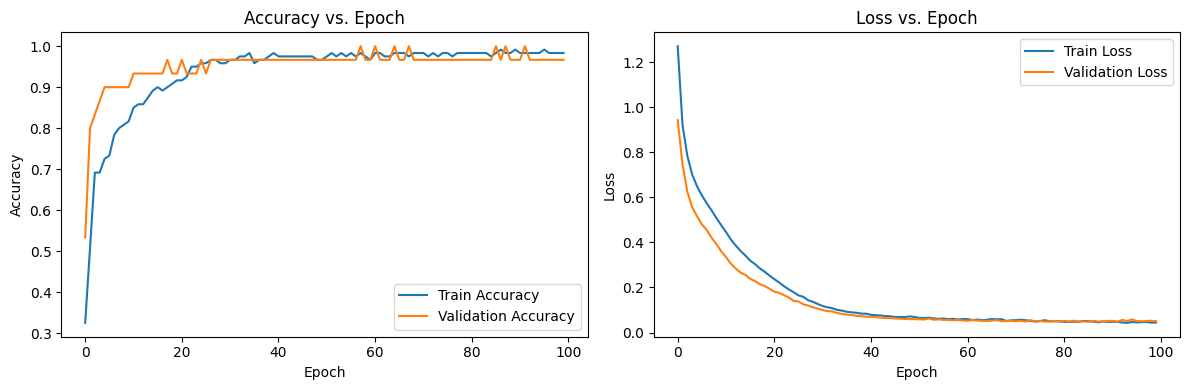

In [72]:
plot_history(history)